# Topics in Quantitative Finance - Homework 1

Assigned: July 19, 2024.
Due: **Monday, July 22, 2024** by 1PM. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
\newcommand{\Pof}[1]{\mathbb{P}\left[ #1 \right]}
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this Jupyter notebook to TA 郭鵬 at [g.p@pku.edu.cn](mailto:g.p@pku.edu.cn) by the due date and time.  All codes must run correctly and solutions must be written up neatly in Markdown/LaTeX format. If you encounter problems with Jupyter notebook, please contact TA [郭鵬](mailto:g.p@pku.edu.cn) or [丁宏駿](dinghongjun@stu.pku.edu.cn).

$$
\newcommand{\Pr}{\mathbb P}
\newcommand{\al}{\alpha}
$$

$$
\newcommand \d {\mathrm d}
\newcommand \del {\partial}
$$

## Name: <font color=blue>刘任达</font>

$B_t$ deontes a standard Brownian motion in the following. 

### 1. (5 points)

Let $X_t = a B_{t/a^2}$, where $a \neq 0$ is constant. Show by definition that $X_t$ is also a standard Brownian motion. 

### <font color=blue> Solution 1. </font>

- First, $\Pr [\omega: X_0(\omega) = 0] = \Pr [\omega: aX_0(\omega) = 0] = 1$. Moreover it's clear that $X_t(\omega) = aB_{t/a^2}$ is a continuous function for all $\omega$ almost surely. 
- Second, 
\begin{equation}
    \begin{aligned}
        \Pr [\alpha \leq X_t - X_s \leq \beta] & = 
        \Pr [\frac \alpha a \leq B_{t/a^2} - B_{s/a^2} \leq \frac \beta a]  
        = \int_{\alpha/a}^{\beta/a} \frac{1}{\sqrt{2\pi(t-s)/a^2}} e^{-\frac{x^2}{2(t-s)/a^2}} \d x\\
        & = \int_{\alpha}^{\beta} \frac{1}{\sqrt{2\pi(t-s)}} e^{-\frac{y^2}{2(t-s)}} \d y \textrm{ (let }y=ax )\\
    \end{aligned}
    \end{equation}
- Third, for all $0 \le f < b \le c < d$, $X_b - X_f = a(B_{b/a^2} - B_{f/a^2}) \perp a(B_{d/a^2} - B_{c/a^2}) = X_d - X_c \implies \textrm{independent increment}$.
- By the above argument, $X_t$ is a standard Brownian motion.


## Donsker's invariance principle

Recall the Donsker's invariance principle: 


Suppose $\{X_i\}_{i=1}^\infty$ is an iid sequence of random variables with mean 0 and and variance 1. Let $S_n = \sum_{i=1}^n X_i$. Define the function $\mathfrak{S}_n$ of $t$ by 

$$
  \mathfrak{S}_n(t) = \frac1{\sqrt n}\sum_{i=1}^n\left[S_{i-1} + n \left( t-\frac{i-1}n \right) X_i \right]\,\1_{\left(\frac{i-1}n,\frac in\right]}(t) .
$$

In fact, $\mathfrak{S}_n$ is simply the linear interpolation of the scaled random walk $\left\{\frac{S_1}{\sqrt n}, \frac{S_2}{\sqrt n}, \cdots, \frac{S_n}{\sqrt n} \right\}$.

Then, $\mathfrak{S}_n\Longrightarrow W$ as $n\to\infty$, where $W$ denotes a standard Brownian motion. 

In other words, as $n\to\infty$, the linearly interpolated scaled random walk $\mathfrak{S}_n$ converges weakly to a standard Brownian motion. 

### 2. (10pts)
In this problem, we show, numerically by simulation, the Donsker's invariance principle with the iid sequence $X_i$ being 

- (a) $X_i \sim t_3$, i.e., the $t$ distribution with degrees of freedom 3;
- (b) $X_i \sim \exp(1)$, i.e., exponential distribution with mean 1.

Consider the Brownian motion in the time interval $[0,2]$, use $100$ time steps and generate $15,000$ sample paths to reproduce the plots for sample mean, sample standard deviation, and the histograms at $t=1$ and $t=2$. To begin with, please set the random seed by including ``numpy.random.seed(9527)`` on top of your code. 

In [1]:
# as always, import required modules and functions
import numpy as np
from numpy import sqrt, log, exp
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.stats import norm
import seaborn as sns

### <font color=blue> Solution 2(a). </font>

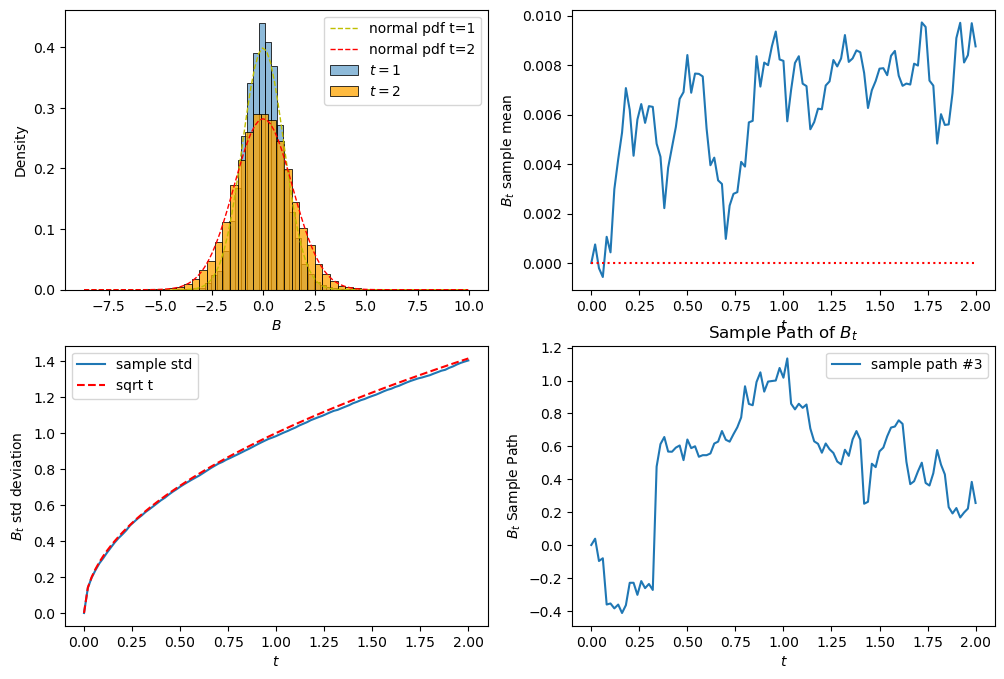

In [7]:
# insert python code for (2a) in this cell
np.random.seed(9527)


# Simulate BM by using the Donsker's invariance principle
# number of samples, number of steps, terminal time
n_sim, n_steps, T, nu = 15_000, 100, 2, 3
dt = T/n_steps

# initialize the Brownians
B = np.zeros([n_sim, n_steps+1]) #B is now a all-0 n_sim row, n_steps+1 column array, each row is a Brownian motion sample path

# simulation step
for i in range(n_steps):
    dB = ss.t.rvs(size=n_sim, df=nu)/sqrt(nu/(nu-2))
#    dB = dB - dB.mean() # now dB has mean 0
#    dB = dB/dB.std()  # now dB has variance 1
    dB = sqrt(dt)*dB
    B[:,i+1] = B[:,i] + dB #For now, we don't care about the row rank (which represent $\Omega$), we construct the sample path anyways

    # plot
t = np.arange(0, T+dt, dt)
#t = np.linspace(0, T, n_steps+1)
plt.figure(figsize=(12, 8))

# histograms
plt.subplot(2, 2, 1)
time = 1
sns.histplot(B[:,t==time], bins=50, stat='density', label=f'$t={time}$') #Here we fix the column index to the corresponding time point, and plot all possible $\omega$'s
sns.histplot(B[:,-1], bins=50, stat='density', color='orange', label=f'$t={T}$') #Here we plot all possible $\omega$'s at the terminal time
x = np.linspace(B[:,-1].min(), B[:,-1].max(), 100)
plt.plot(x, norm.pdf(x), 'y--', lw=1, label='normal pdf t=1') #The supposed normal distribution is shown here and below
plt.plot(x, norm.pdf(x, scale=sqrt(T)), 'r--', lw=1, label='normal pdf t=2')
plt.xlabel('$B$')
plt.legend();

#EXERCISE: SIMULATE CENTRAL LIMIT THEOREM

# sample mean
plt.subplot(2, 2, 2)
plt.plot(t, B.mean(axis=0)) #B.mean(axis=0) calculates the mean of each column, for a given time point
plt.hlines(y=0, xmin=0, xmax=T, color='red', ls='dotted')
plt.xlabel('$t$')
plt.ylabel('$B_t$ sample mean')


# sample standard deviation
plt.subplot(2, 2, 3)
plt.plot(t, B.std(axis=0), label='sample std')
plt.plot(t, np.sqrt(t), 'r--', label='sqrt t')
plt.xlabel('$t$')
plt.ylabel('$B_t$ std deviation')

plt.legend();

#sample path
plt.subplot(2, 2, 4)
plt.plot(t, B[3, :], label=f'sample path #3')
plt.xlabel('$t$')
plt.ylabel('$B_t$ Sample Path')
plt.title('Sample Path of $B_t$')
plt.legend();

### <font color=blue> Solution 2(b). </font>

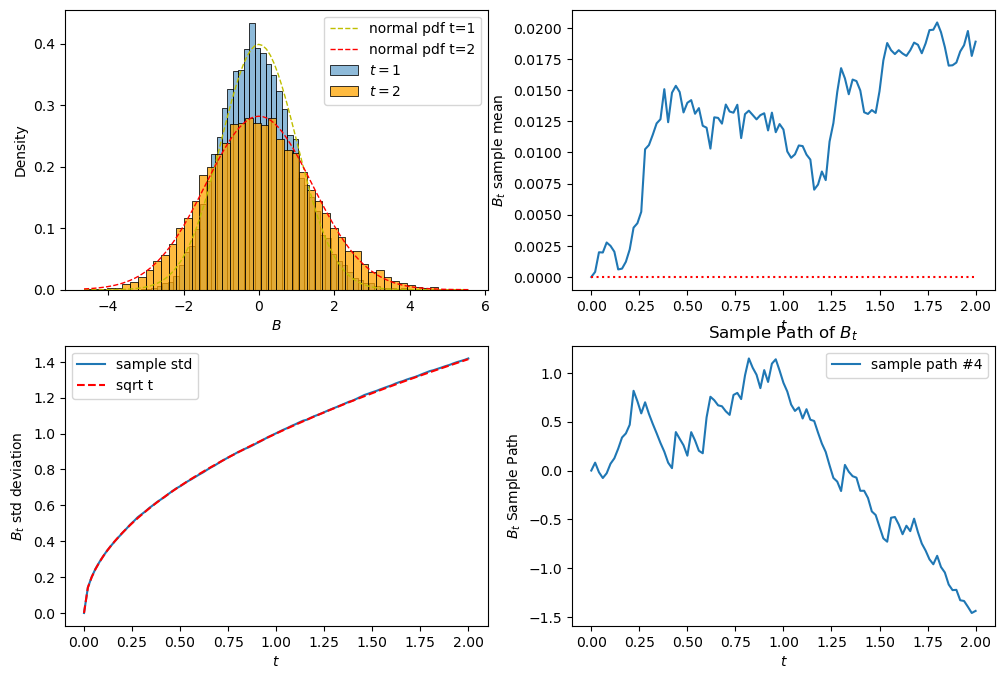

In [5]:
# insert python code for (2b) in this cell
np.random.seed(9527)


# Simulate BM by using the Donsker's invariance principle
# number of samples, number of steps, terminal time
n_sim, n_steps, T, nu = 15000, 100, 2, 3
dt = T/n_steps

# initialize the Brownians
B = np.zeros([n_sim, n_steps+1]) #B is now a all-0 n_sim row, n_steps+1 column array, each row is a Brownian motion sample path

# simulation step
for i in range(n_steps):
    dB = ss.expon.rvs(size=n_sim) - 1
#    dB = dB - dB.mean() # now dB has mean 0
#    dB = dB/dB.std()  # now dB has variance 1
    dB = sqrt(dt)*dB
    B[:,i+1] = B[:,i] + dB
    # plot
t = np.arange(0, T+dt, dt)
#t = np.linspace(0, T, n_steps+1)
plt.figure(figsize=(12, 8))

# histograms
plt.subplot(2, 2, 1)
time = 1
sns.histplot(B[:,t==time], bins=50, stat='density', label=f'$t={time}$') #Here we fix the column index to the corresponding time point, and plot all possible $\omega$'s
sns.histplot(B[:,-1], bins=50, stat='density', color='orange', label=f'$t={T}$') #Here we plot all possible $\omega$'s at the terminal time
x = np.linspace(B[:,-1].min(), B[:,-1].max(), 100)
plt.plot(x, norm.pdf(x), 'y--', lw=1, label='normal pdf t=1') #The supposed normal distribution is shown here and below
plt.plot(x, norm.pdf(x, scale=sqrt(T)), 'r--', lw=1, label='normal pdf t=2')
plt.xlabel('$B$')
plt.legend();

#EXERCISE: SIMULATE CENTRAL LIMIT THEOREM

# sample mean
plt.subplot(2, 2, 2)
plt.plot(t, B.mean(axis=0)) #B.mean(axis=0) calculates the mean of each column, for a given time point
plt.hlines(y=0, xmin=0, xmax=T, color='red', ls='dotted')
plt.xlabel('$t$')
plt.ylabel('$B_t$ sample mean')


# sample standard deviation
plt.subplot(2, 2, 3)
plt.plot(t, B.std(axis=0), label='sample std')
plt.plot(t, np.sqrt(t), 'r--', label='sqrt t')
plt.xlabel('$t$')
plt.ylabel('$B_t$ std deviation')
plt.legend();

#sample path
plt.subplot(2, 2, 4)
plt.plot(t, B[4, :], label=f'sample path #4')
plt.xlabel('$t$')
plt.ylabel('$B_t$ Sample Path')
plt.title('Sample Path of $B_t$')
plt.legend()


### 3. (10pts)
Alter the `python` code provided in the lecture to simulate the process $X_t$ given by

$$
X_t = 1 + 3t(2-t) + B_t,
$$

for $0 \leq t \leq 2$. Use $200$ time steps and generate $20,000$ sample paths, plot sample mean, sample standard deviation (as functions of $t$), and the histograms at $t = 1$ and $t=2$.  To begin with, set `numpy.random.seed(1732)`. 

### <font color=blue> Solution 3. </font>

<>:53: SyntaxWarning: invalid escape sequence '\s'
<>:67: SyntaxWarning: invalid escape sequence '\o'
<>:53: SyntaxWarning: invalid escape sequence '\s'
<>:67: SyntaxWarning: invalid escape sequence '\o'
C:\Users\20249\AppData\Local\Temp\ipykernel_305696\3008780157.py:53: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(t, np.sqrt(t), 'r--', label='$\sqrt{t}$')
C:\Users\20249\AppData\Local\Temp\ipykernel_305696\3008780157.py:67: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('$X_t(\omega)$')


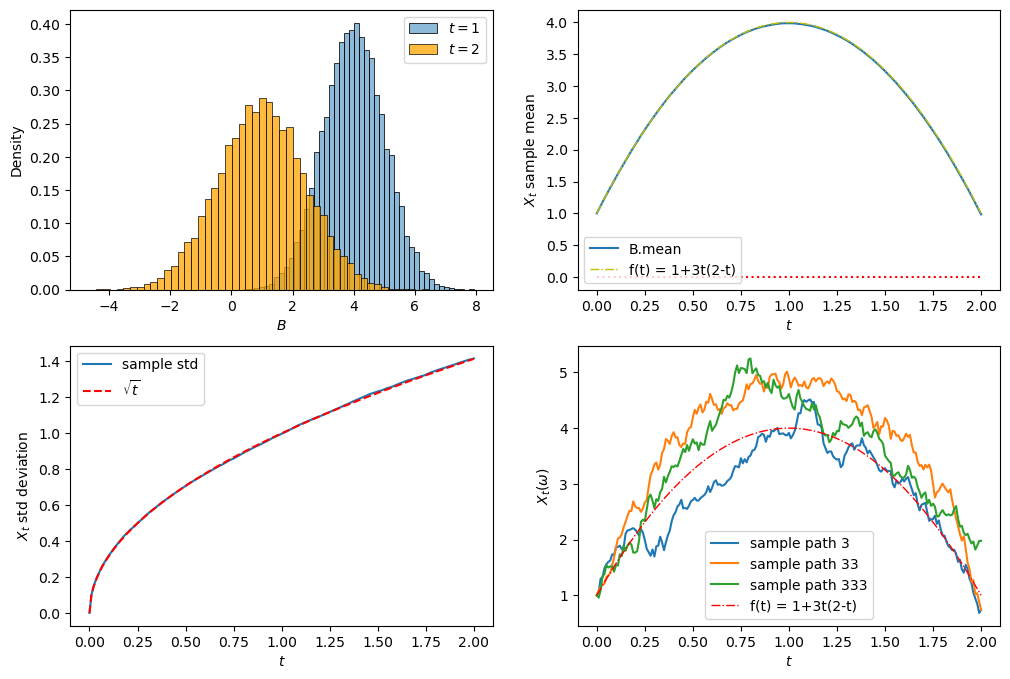

In [8]:
# insert python code for (3) in this cell
np.random.seed(1732)


# Simulate BM by using the Donsker's invariance principle
# number of samples, number of steps, terminal time
n_sim, n_steps, T, nu = 20000, 200, 2, 3
dt = T/n_steps

# initialize the Brownians
B = np.zeros([n_sim, n_steps+1]) #B is now a all-0 n_sim row, n_steps+1 column array, each row is a Brownian motion sample path

# simulation step
for i in range(n_steps):
    dB = norm.rvs(size=n_sim)
#    dB = dB - dB.mean() # now dB has mean 0
#    dB = dB/dB.std()  # now dB has variance 1
    dB = sqrt(dt)*dB
    B[:,i+1] = B[:,i] + dB #For now, we don't care about the row rank (which represent $\Omega$), we construct the sample path anyways

    # plot
t = np.arange(0, T+dt, dt)
for i in range(n_steps+1):
    B[:,i] = 1 + 3*t[i]*(2-t[i]) + B[:,i]
#t = np.linspace(0, T, n_steps+1)
plt.figure(figsize=(12, 8))

# histograms
plt.subplot(2, 2, 1)
time = 1
sns.histplot(B[:,t==time], bins=50, stat='density', label=f'$t={time}$') #Here we fix the column index to the corresponding time point, and plot all possible $\omega$'s
sns.histplot(B[:,-1], bins=50, stat='density', color='orange', label=f'$t={T}$') #Here we plot all possible $\omega$'s at the terminal time
x = np.linspace(B[:,-1].min(), B[:,-1].max(), 100)
plt.xlabel('$B$')
plt.legend();



# sample mean
plt.subplot(2, 2, 2)

plt.plot(t, B.mean(axis=0), label='B.mean') #B.mean(axis=0) calculates the mean of each column, for a given time point
plt.plot(t, 1+3*t*(2-t), 'y-.', lw=1, label='f(t) = 1+3t(2-t)')
plt.hlines(y=0, xmin=0, xmax=T, color='red', ls='dotted')
plt.xlabel('$t$')
plt.ylabel('$X_t$ sample mean')
plt.legend();


# sample standard deviation
plt.subplot(2, 2, 3)
plt.plot(t, B.std(axis=0), label='sample std')
plt.plot(t, np.sqrt(t), 'r--', label='$\sqrt{t}$')
plt.xlabel('$t$')
plt.ylabel('$X_t$ std deviation')

plt.legend();

#curious about what the sample paths look like
plt.subplot(2, 2, 4)
plt.plot(t, B[3,:], label='sample path 3')
plt.plot(t, B[33,:], label='sample path 33')
plt.plot(t, B[333,:], label='sample path 333')
plt.plot(t, 1+3*t*(2-t), 'r-.', lw=1, label='f(t) = 1+3t(2-t)')

plt.xlabel('$t$')
plt.ylabel('$X_t(\omega)$')
plt.legend();